In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
summary_statistics = pd.read_csv("summary_statistics.csv")
summary_statistics.head()

,file,variables,constraints,nonzeros,density,sparsity_%,row_nnz_variance,col_nnz_variance,min_coefficient,max_coefficient,mean_coefficient,std_coefficient,integer_like_%,matrix_rank,avg_row_L2_norm,max_row_L2_norm,zero_rows,zero_columns
0,50v-10,2013,233,2745,0.005853,99.414748,5.922047,0.595041,-216.0,1.0,-43.466667,62.082597,100.000000,232,231.340446,293.513202,0,0
1,air05,7195,426,52121,0.017005,98.299517,7091.870622,3.601867,1.0,1.0,1.000000,0.000000,100.000000,367,10.359497,20.099751,0,0
2,app1-1,2480,4926,18275,0.001496,99.850407,12.640369,3104.559439,-1.0,1.0,0.096302,0.772661,60.355677,2480,1.423756,7.000000,0,0
3,assign1-5-8,156,161,3720,0.148113,85.188724,63.771459,71.681460,-5.0,1.0,-1.962366,1.345515,100.000000,156,10.668728,14.628739,0,0
4,b1c1s1,3872,3904,11408,0.000755,99.924532,12.391477,3.745048,-480.0,50.0,-41.872931,137.725341,96.633941,3584,128.017207,480.001042,0,0


In [3]:
summary_statistics.describe()

,variables,constraints,nonzeros,density,sparsity_%,row_nnz_variance,col_nnz_variance,min_coefficient,max_coefficient,mean_coefficient,std_coefficient,integer_like_%,matrix_rank,avg_row_L2_norm,max_row_L2_norm,zero_rows,zero_columns
count,94.000000,94.000000,9.400000e+01,94.000000,94.000000,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,94.000000,94.000000,9.400000e+01,9.400000e+01,94.000000,94.000000
mean,2479.702128,2118.680851,5.721414e+04,0.086225,91.377489,4.443851e+04,2.026298e+04,-1.055517e+06,1.066437e+06,-3.504013e+04,1.281949e+05,90.658380,1397.872340,1.365139e+05,3.378086e+07,24.563830,12.042553
std,2207.072200,2242.010389,2.081591e+05,0.217317,21.731740,3.061980e+05,1.453451e+05,9.352668e+06,1.031395e+07,2.395310e+05,8.991894e+05,22.183151,1576.942538,9.226266e+05,3.089157e+08,237.634288,84.817567
min,30.000000,4.000000,1.230000e+02,0.000409,6.300813,0.000000e+00,0.000000e+00,-9.038285e+07,1.000000e+00,-1.676996e+06,0.000000e+00,0.000000,4.000000,1.423756e+00,3.000000e+00,0.000000,0.000000
25%,551.250000,397.500000,3.205500e+03,0.002068,97.371691,5.957413e+00,1.108787e+00,-9.657500e+02,1.000000e+00,-9.851998e+00,1.354413e+00,96.322631,273.250000,5.972677e+00,1.599649e+01,0.000000,0.000000
50%,2098.000000,1227.000000,1.084250e+04,0.005924,99.407646,6.036921e+01,1.667326e+01,-1.179211e+01,1.645877e+01,5.130624e-01,2.886533e+01,100.000000,914.000000,7.002530e+01,3.458630e+02,0.000000,0.000000
75%,3534.250000,4110.250000,2.641425e+04,0.026283,99.793236,7.739230e+02,8.723198e+01,-1.000000e+00,4.195000e+02,1.267800e+01,3.125321e+02,100.000000,1919.750000,4.492642e+02,6.987500e+03,0.000000,0.000000
max,8644.000000,8580.000000,1.761016e+06,0.936992,99.959052,2.935609e+06,1.374000e+06,1.000000e+00,1.000000e+08,5.709128e+03,8.087541e+06,100.000000,8467.000000,7.445455e+06,2.991952e+09,2304.000000,742.000000


Text(0.5, 1.0, 'Distribution of Matrix Densities')

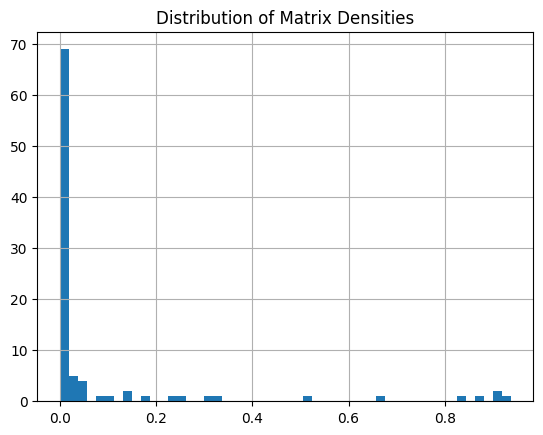

In [4]:
summary_statistics['density'].hist(bins=50)
plt.title('Distribution of Matrix Densities')

Text(0.5, 1.0, 'Distribution of Constraints')

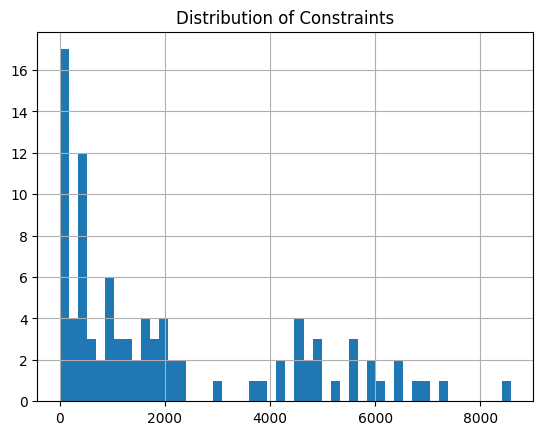

In [5]:
summary_statistics['constraints'].hist(bins=50)
plt.title('Distribution of Constraints')

Text(0.5, 1.0, 'Distribution of Variables')

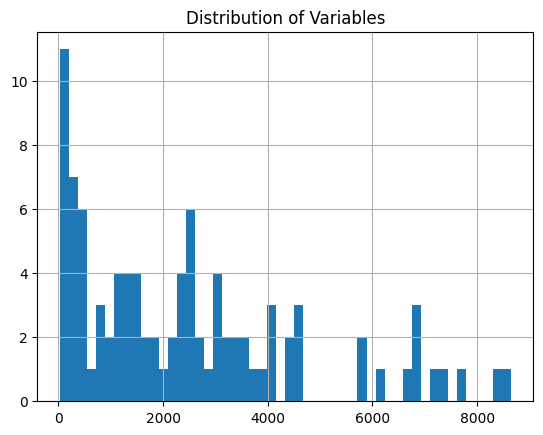

In [6]:
summary_statistics['variables'].hist(bins=50)
plt.title('Distribution of Variables')

Text(0.5, 1.0, 'Distribution of Matrix Rank')

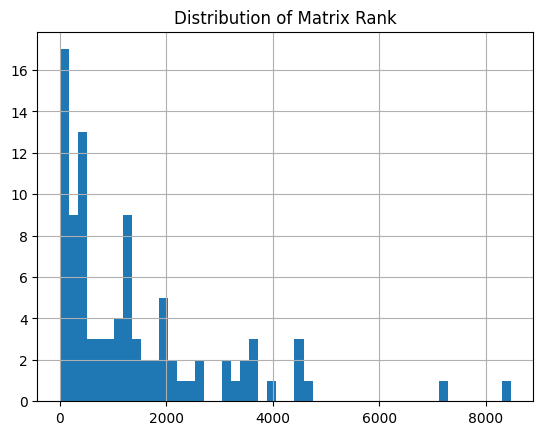

In [7]:
summary_statistics['matrix_rank'].hist(bins=50)
plt.title('Distribution of Matrix Rank')

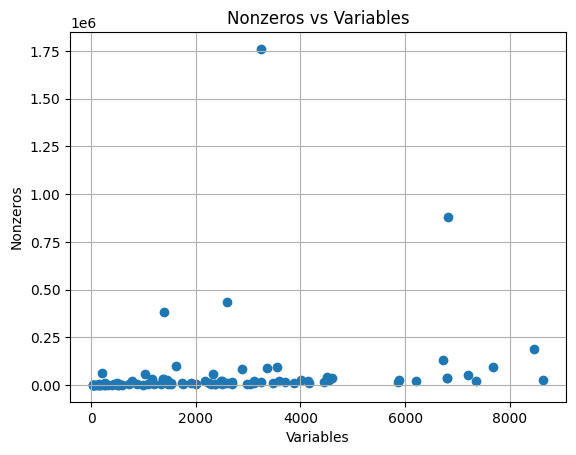

In [8]:
plt.scatter(summary_statistics['variables'], summary_statistics['nonzeros'])
plt.xlabel('Variables')
plt.ylabel('Nonzeros')
plt.title('Nonzeros vs Variables')
plt.grid(True)

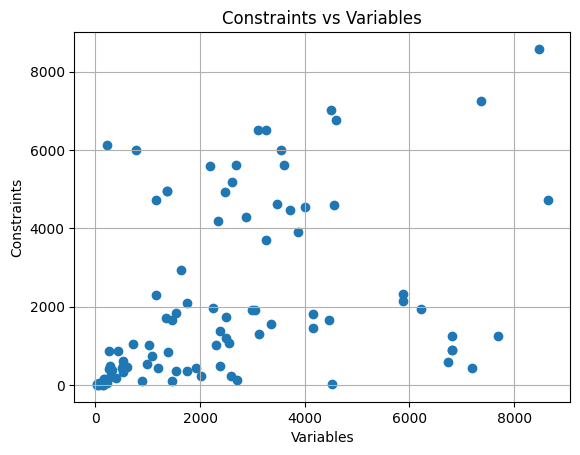

In [9]:
plt.scatter(summary_statistics['variables'], summary_statistics['constraints'])
plt.xlabel('Variables')
plt.ylabel('Constraints')
plt.title('Constraints vs Variables')
plt.grid(True)

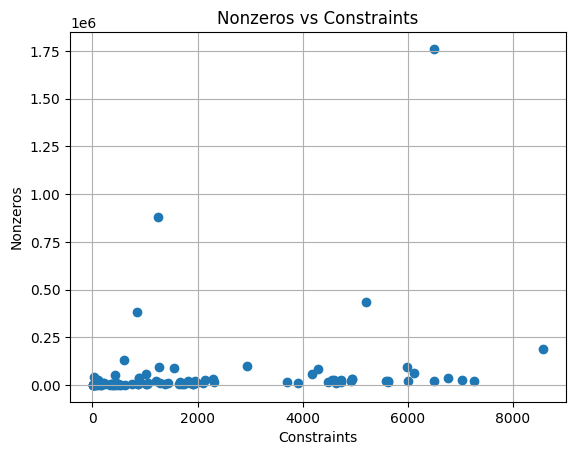

In [10]:
plt.scatter(summary_statistics['constraints'], summary_statistics['nonzeros'])
plt.xlabel('Constraints')
plt.ylabel('Nonzeros')
plt.title('Nonzeros vs Constraints')
plt.grid(True)
plt.show()

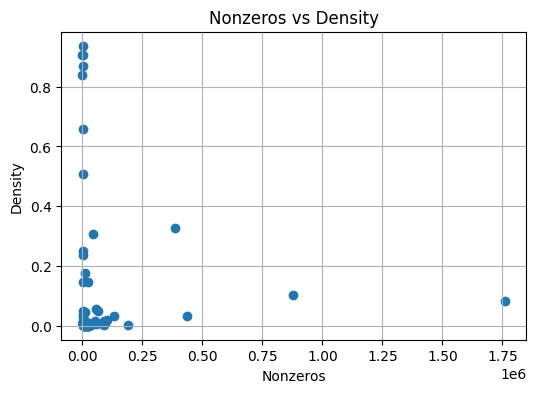

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(summary_statistics['nonzeros'], summary_statistics['density'])
plt.xlabel('Nonzeros')
plt.ylabel('Density')
plt.title('Nonzeros vs Density')
plt.grid(True)
plt.show()

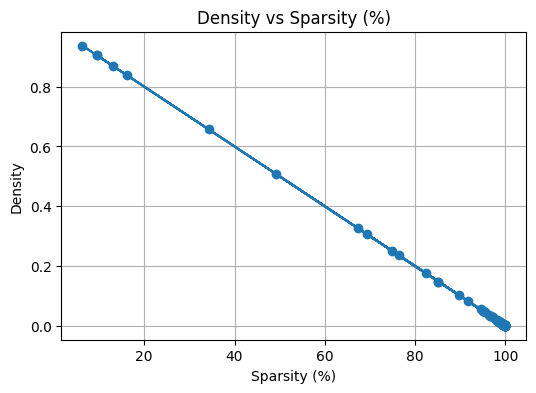

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(summary_statistics['sparsity_%'], summary_statistics['density'], 'o-')
plt.xlabel('Sparsity (%)')
plt.ylabel('Density')
plt.title('Density vs Sparsity (%)')
plt.grid(True)
plt.show()

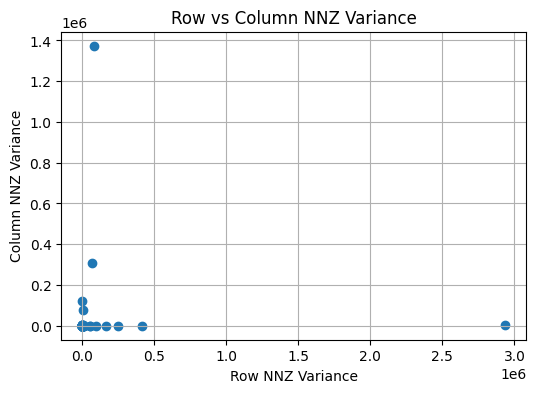

In [13]:

plt.figure(figsize=(6, 4))
plt.scatter(summary_statistics['row_nnz_variance'], summary_statistics['col_nnz_variance'])
plt.xlabel('Row NNZ Variance')
plt.ylabel('Column NNZ Variance')
plt.title('Row vs Column NNZ Variance')
plt.grid(True)
plt.show()

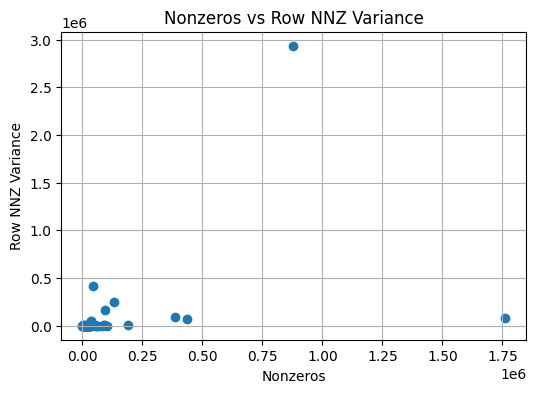

In [14]:
plt.figure(figsize=(6, 4))
plt.scatter(summary_statistics['nonzeros'], summary_statistics['row_nnz_variance'])
plt.xlabel('Nonzeros')
plt.ylabel('Row NNZ Variance')
plt.title('Nonzeros vs Row NNZ Variance')
plt.grid(True)
plt.show()

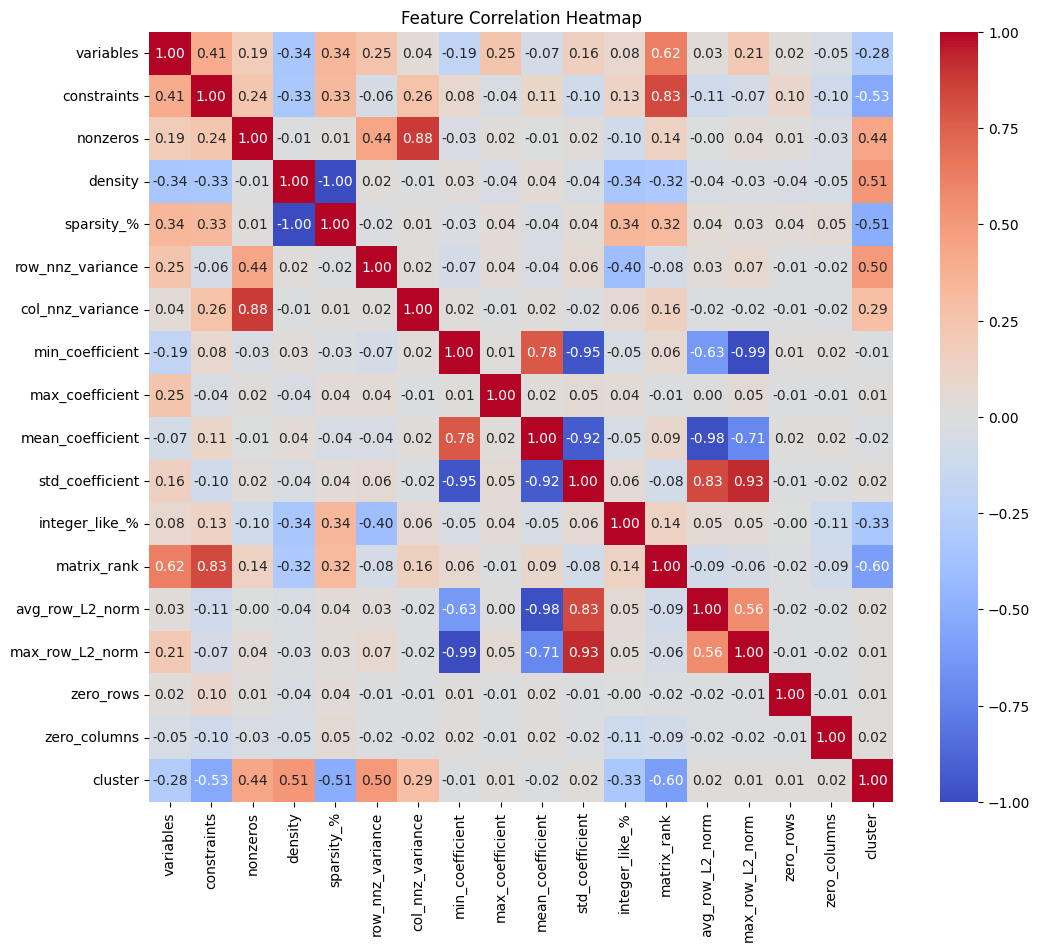

In [22]:
numeric_df = summary_statistics.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10)) 
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

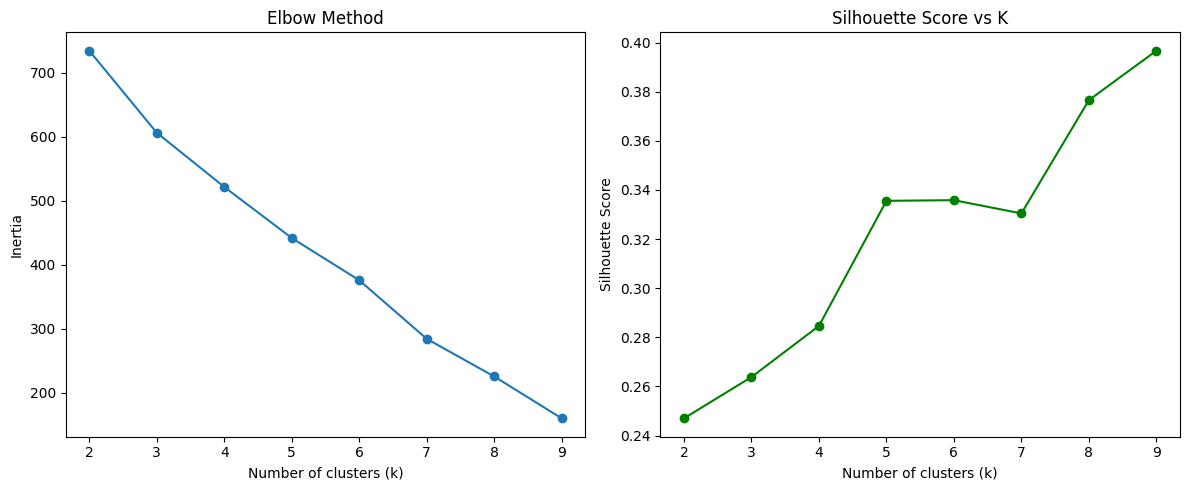

In [43]:
# we choose only numerical variables and remove any that are highly correlated with each other, based on the heatmap
features = [
    'variables', 'constraints', 'nonzeros', 'density',
    'avg_row_L2_norm', 'max_row_L2_norm',
    'integer_like_%', 'zero_rows', 'zero_columns'
]

X = summary_statistics[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow method
inertia = []
silhouette_scores = []

K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'o-g')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')

plt.tight_layout()
plt.show()

best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init='auto')
summary_statistics['cluster'] = kmeans.fit_predict(X_scaled)


We use the elbow method to choose the best number of clusters. The silhouette score ranges from -1 to 1, where a higher score means the points are well clustered. There is no clear best number of clusters for K-means, and even when each variable has its own cluster, the best silhouette score we get is 0.40. We conclude that K-Means clustering is not the best method for our dataset. 

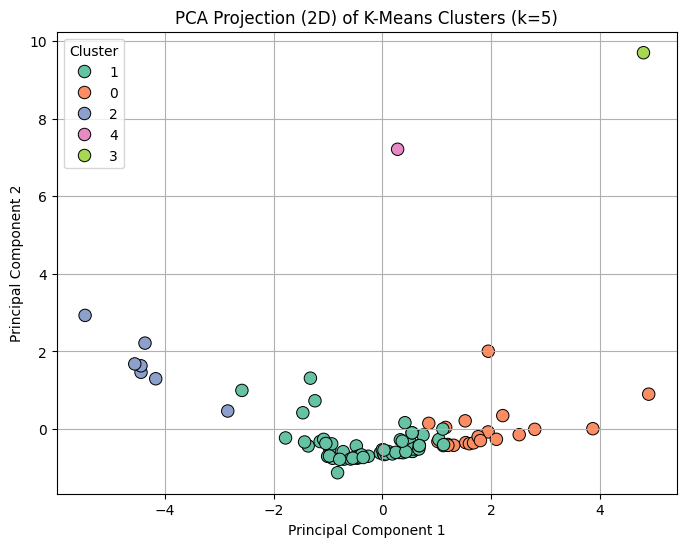

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=summary_statistics['cluster'].astype(str),
                palette='Set2', s=80, edgecolor='black')
plt.title('PCA Projection (2D) of K-Means Clusters (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


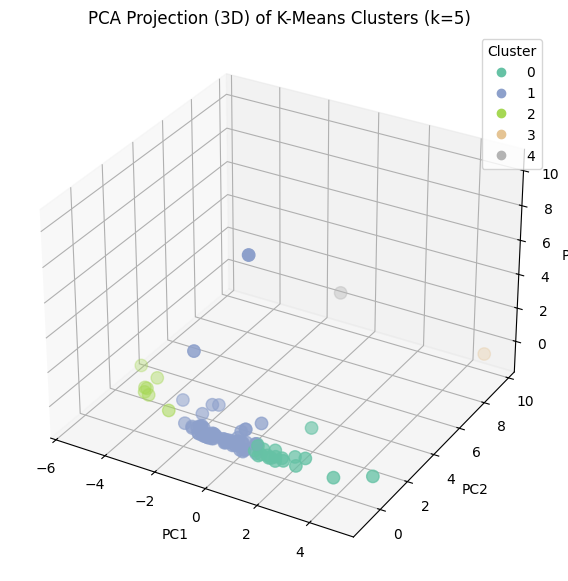

In [18]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=summary_statistics['cluster'], cmap='Set2', s=80)
ax.set_title('PCA Projection (3D) of K-Means Clusters (k=5)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

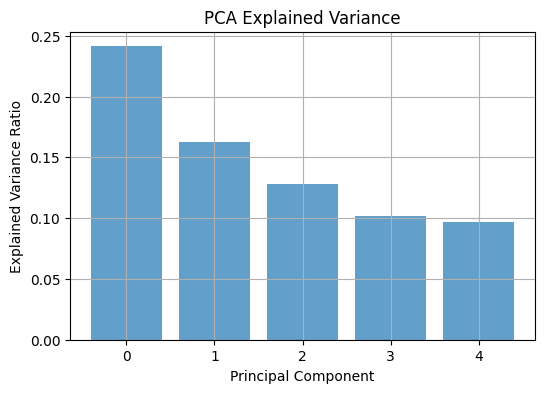

In [19]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.bar(range(0, 5), explained_var, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
The following is our final clustering method. This is the best performing one. 

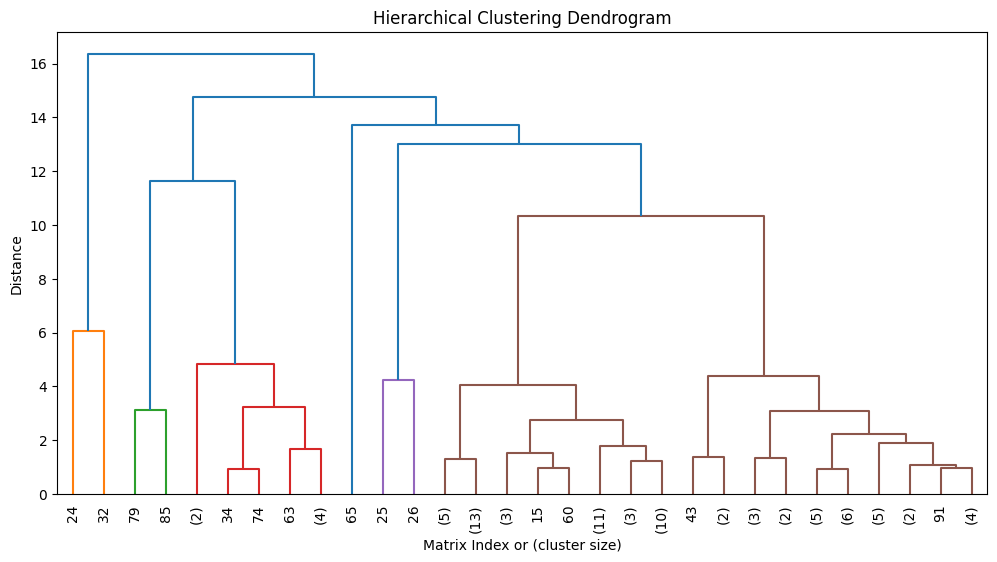

Silhouette Score for k=5: 0.605


In [50]:
# Select features (after removing correlated ones)
features = [
    'variables', 'constraints', 'nonzeros', 'density',
    'avg_row_L2_norm', 'max_row_L2_norm',
    'integer_like_%', 'zero_rows', 'zero_columns'
]

X = summary_statistics[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: reduce dimensionality for visualization and better clustering structure
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Plot dendrogram to help choose number of clusters
linked = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Matrix Index or (cluster size)")
plt.ylabel("Distance")
plt.show()

# Choose a number of clusters, e.g., 4 (you can adjust based on dendrogram)
best_k = 5
agglo = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
summary_statistics['cluster'] = agglo.fit_predict(X_pca)

# Evaluate silhouette score
score = silhouette_score(X_pca, summary_statistics['cluster'])
print(f"Silhouette Score for k={best_k}: {score:.3f}")


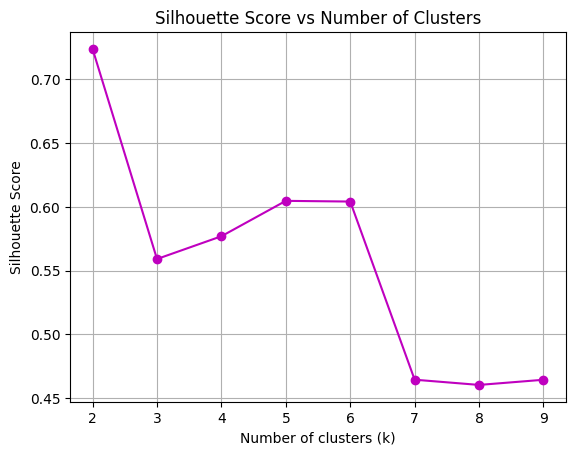

In [51]:
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score vs K (Elbow-like)
plt.plot(K_range, silhouette_scores, 'o-m')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

Now our silhouette score is much higher, 0.605 at k=5 clusters. 

Explained PCA variance per cluster (normalized):
cluster
1    384.793677
0    181.182174
2     25.214987
4      0.843853
3      0.000000
dtype: float64


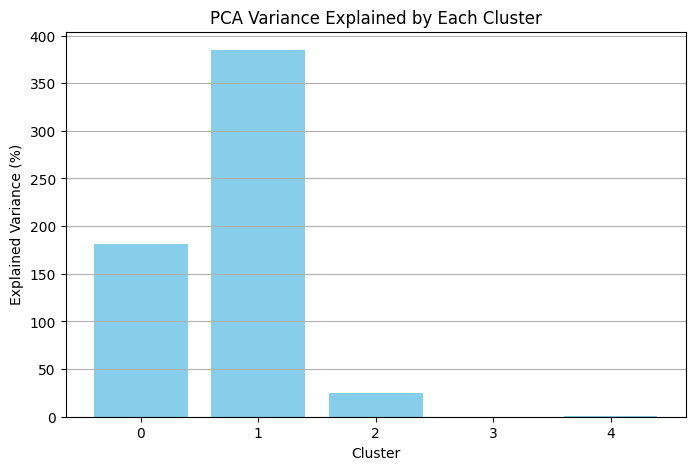

In [61]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
summary_statistics[['pca1', 'pca2', 'pca3']] = X_pca
cluster_variance = summary_statistics.groupby('cluster')[['pca1', 'pca2', 'pca3']].var().sum(axis=1)

# Normalize: percentage of total PCA variance per cluster
total_variance = np.sum(np.var(X_pca, axis=0))  # sum of variances along all components
cluster_variance_percent = 100 * cluster_variance / total_variance

print("Explained PCA variance per cluster (normalized):")
print(cluster_variance_percent.sort_values(ascending=False))

plt.figure(figsize=(8, 5))
plt.bar(cluster_variance_percent.index.astype(str), cluster_variance_percent.values, color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Explained Variance (%)")
plt.title("PCA Variance Explained by Each Cluster")
plt.grid(True, axis='y')
plt.show()


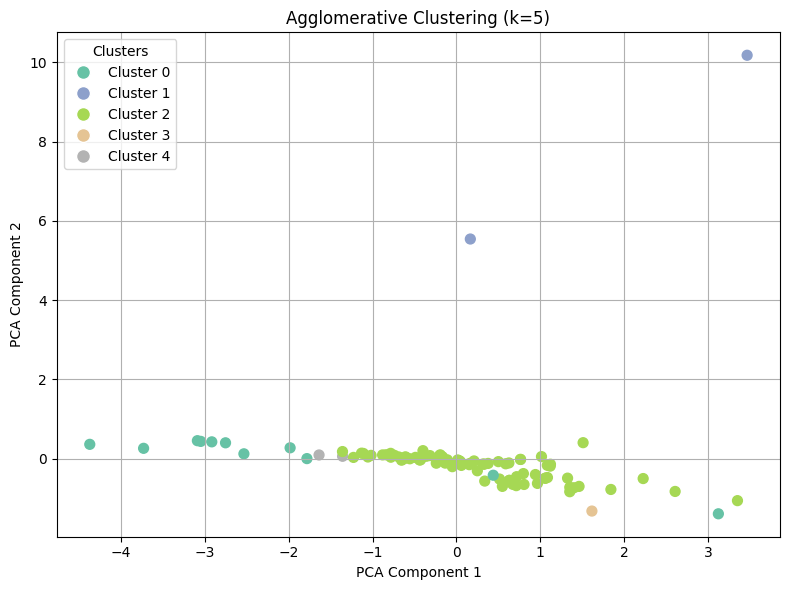

In [62]:
X_2d = PCA(n_components=2).fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=summary_statistics['cluster'],
    cmap='Set2', s=50
)

plt.title(f"Agglomerative Clustering (k={best_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)

unique_clusters = np.unique(summary_statistics['cluster'])
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_clusters)))

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=f'Cluster {int(i)}',
           markerfacecolor=colors[j], markersize=10)
    for j, i in enumerate(unique_clusters)
]

plt.legend(handles=legend_elements, title="Clusters", loc="best")
plt.tight_layout()
plt.show()

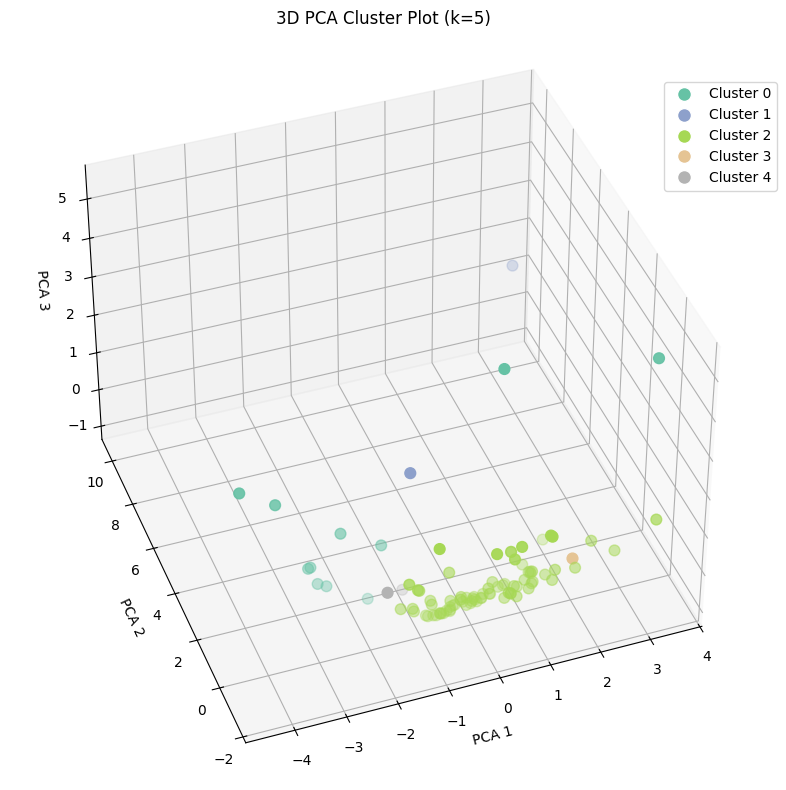

In [58]:
X_3d = summary_statistics[['pca1', 'pca2', 'pca3']].values
labels = summary_statistics['cluster']

unique_clusters = np.unique(labels)
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_clusters)))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_id, color in zip(unique_clusters, colors):
    cluster_points = X_3d[labels == cluster_id]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2],
               label=f'Cluster {cluster_id}', color=color, s=60)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title(f'3D PCA Cluster Plot (k={len(unique_clusters)})')

legend_elements = [Line2D([0], [0], marker='o', color='w',
                          label=f'Cluster {i}',
                          markerfacecolor=colors[i], markersize=10)
                   for i in unique_clusters]

fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.9, 0.9))

# View angle 
ax.view_init(elev=40, azim=250) # elev ranges from -90 to 90, azim ranges from 0 to 360

plt.tight_layout()
plt.show()


In [57]:
# means of each cluster
summary_statistics.groupby('cluster')[features].mean()

,variables,constraints,nonzeros,density,avg_row_L2_norm,max_row_L2_norm,integer_like_%,zero_rows,zero_columns
cluster,,,,,,,,,
0,1030.636364,764.000000,241844.181818,0.554572,9.987387e+03,1.308706e+04,55.155510,0.000000,0.000000
1,3526.500000,494.500000,66516.500000,0.023554,6.245465e+06,1.500176e+09,98.677686,0.000000,0.500000
2,2675.576923,2366.858974,31917.666667,0.024760,2.964079e+03,2.241908e+06,95.925709,0.064103,0.333333
3,2883.000000,4289.000000,81746.000000,0.006611,2.689102e+00,1.204159e+01,90.634404,2304.000000,0.000000
4,1562.000000,429.500000,6743.000000,0.009916,1.585341e+02,1.796567e+04,72.491030,0.000000,552.500000
